<a href="https://colab.research.google.com/github/NMashalov/Python-MIPT-education-course-2023-Spring/blob/main/%D0%93%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0_%D0%B8_%D1%82%D0%B5%D0%BA%D1%81%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🎯 План занятия
- преобразование пиксельное изображение в векторное
- узнаем как распознать документ на русском языке в одну строку
- попробуем организовать информационный поиск по журналу Квант с помощью классических и нейросетевых методов

## Растровая и векторная графика.

Для отображения изображения на экране необходимо задать цвет, задающеся тройкой (r,g,b) целых чисел в отрезке [0,255], для каждого пикселя. Мониторы в зависимости от реализации, имеют разное количество пикселей на экране - плотностность пикселей.

Форматы видео также привязаны к размеру сетки. Например, Full Hd гарантирует сетку не хуже 1920x1080. Такое разрешение, позволяет комфортно смотреть видео на большом экране.

Графику на сетке называют растровой. Название появилась от первых мониторов, которые работали на электронно лучевой трубке. Растр это правило обхода экрана змейкой слева направо сверху вниз.
```
>--------------|
|--------------<                
...
```

Векторная графика использует параметрические кривы: полиномы, кривые безье, фигуры для отображения графики. Растровая - сетку, которой закрашивает

💡 Разминка.
- как думайте к какой графике принадлжит текст
- какой подход больше весит
- какие редакторы рисуют в пикселях, а какие в векторе
- а можно ли совместить оба подхода

<details>
    <summary>Подробнее про игры</summary>
    Если вас заинтересовал вопрос,то вам наверняка будет интересно
    узнать больше про <a href="https://en.wikipedia.org/wiki/Shader">шейдеры</a>. Это программа для отображения, которая позволяет запускать параллельную обработку изображения, предназначенный для видеокарт.Самый простой пример монте карло - из источника света выпускаются лучи во все стороны, которые спустя время распостранения попадают в камеру, где активируют пиксели изображения.
    Поиграть с шейдерами можно на открытой и бесплатной площадке <a href="https://www.shadertoy.com/">ShaderToy</a>. Сайт содержит большое количество примеров математических моделей описания явлений: снегопад, походки, ландшафта.
</details>


<details>
    <summary>Подробнее про совмещение</summary>
    Современная графика преимущественно слоистая. Для совмещения изображений также используется альфа-слой,задающий прозрачность каждого из слоя. Этот аттрибут добавляется
</details>


Растр:
- примеры: jpeg, png, bmp
- сжатие происходит путем понижения частоты изображения в каждом из каналов с помощью методов фурье

Векторное изображение
- примеры: svg, postscript
- cжатие происходит путем уменьшения числа кривых

Преобразование векторного изображения в растровый называется [растеризацией](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F).
Обратный подход называется [векторизацией](https://ru.wikipedia.org/wiki/%D0%92%D0%B5%D0%BA%D1%82%D0%BE%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F_(%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D0%BA%D0%B0) или трассировкой.


Большинство подходов основаны на специально подобраных свертках, которые позволяют выделять контуры у изображения

In [7]:
!sudo apt install potrace  imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
potrace is already the newest version (1.16-2).
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common imagemagick-6.q16 libdjvulibre-text libdjvulibre21
  libfftw3-double3 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0
  libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10
  libwmflite-0.2-7 netpbm poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x imagemagick-doc autotrace cups-bsd | lpr | lprng enscript gimp
  gnuplot grads hp2xx html2ps libwmf-bin mplayer povray radiance sane-utils
  texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev inkscape
  poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho
  fonts-japanese-gothic | fonts-ipafont-g

In [68]:
# скачиваем изображение
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Pyrrhula_pyrrhula_female_2.jpg/1280px-Pyrrhula_pyrrhula_female_2.jpg -O example.png

--2024-05-16 05:35:00--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Pyrrhula_pyrrhula_female_2.jpg/1280px-Pyrrhula_pyrrhula_female_2.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206931 (202K) [image/jpeg]
Saving to: ‘example.png’

example.png         100%[===================>] 202.08K  --.-KB/s    in 0.05s   

2024-05-16 05:35:01 (3.78 MB/s) - ‘example.png’ saved [206931/206931]



Potrace к сожалению работает только с bmp, поэтому предварительно перевеодим его в этот вид.
<details>
<summary>BMP</summary>
BMP это самый наивный формат хранения. Он хранит в порядке растра 3 числа, соответствующие цвета, в байтовом виде. Такой формат не использует сжатия, поэтом он имеет значительно больший вес чем png

</details>

In [69]:
!convert example.png result.bmp

In [74]:
!potrace result.bmp --svg result.svg

potrace: result.svg: file format not recognized
Possible input file formats are: pnm (pbm, pgm, ppm), bmp.


Получилось не очень

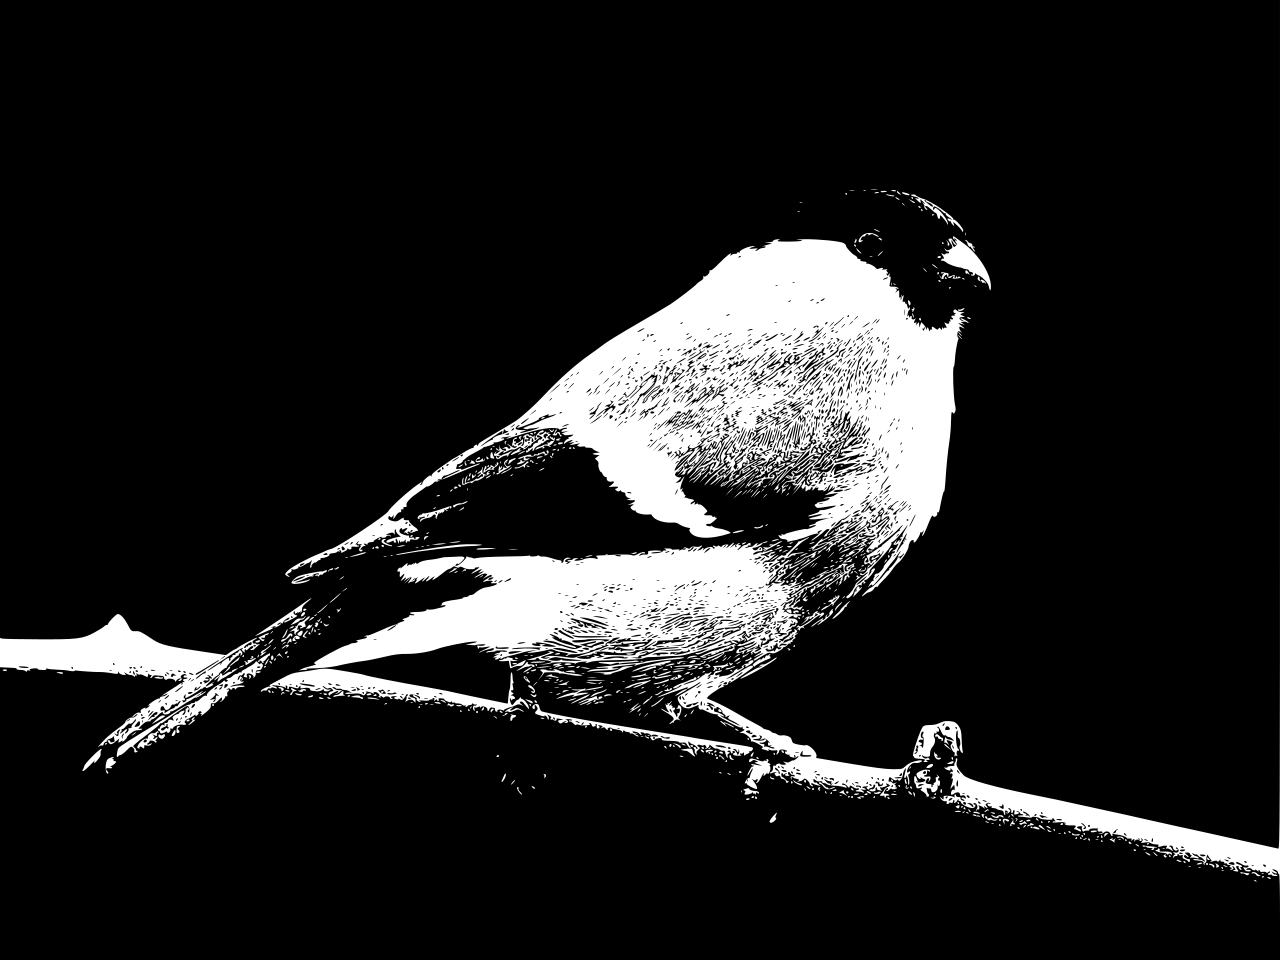

In [2]:
from IPython.display import SVG, display

display(SVG(filename='./result.svg'))

Выделение контуров называет скелетонизацией. Алгоритмы выполняющие такую задачу называются морфологическими.

Такими же подходами изображение поворачивается, наклоняется и сжимается.

На странице [opencv](https://docs.opencv.org/4.x/d9/d61/tutorial_py_morphological_ops.html) также приведены примеры устранения дефектов изображения.

### Работа с реальным датасетом. Векторизация условий задач

In [95]:
!wget https://koi.tspu.ru/waves/ch1_3.files/image014.jpg -O case.jpg

--2024-05-16 05:50:33--  https://koi.tspu.ru/waves/ch1_3.files/image014.jpg
Resolving koi.tspu.ru (koi.tspu.ru)... 193.106.132.98
Connecting to koi.tspu.ru (koi.tspu.ru)|193.106.132.98|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4322 (4.2K) [image/jpeg]
Saving to: ‘case.jpg’

case.jpg            100%[===================>]   4.22K  --.-KB/s    in 0s      

2024-05-16 05:50:35 (1.73 GB/s) - ‘case.jpg’ saved [4322/4322]



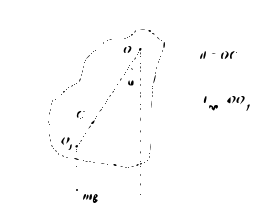

In [8]:
!convert case.jpg case.pnm
!potrace case.pnm -t  --svg
display(SVG(filename='./case.svg'))

In [ ]:
!pip install -q datasets

In [42]:
from datasets import load_dataset

dataset = load_dataset("lmms-lab/OlympiadBench")

en - английский
cn (ChiNese)- китайский

In [43]:
dataset

DatasetDict({
    test_en: Dataset({
        features: ['question_id', 'subfield', 'context', 'question', 'images', 'final_answer', 'is_multiple_answer', 'unit', 'answer_type', 'error', 'source'],
        num_rows: 2126
    })
    test_cn: Dataset({
        features: ['question_id', 'subfield', 'context', 'question', 'images', 'final_answer', 'is_multiple_answer', 'unit', 'answer_type', 'error', 'source'],
        num_rows: 6351
    })
})

In [53]:
from datasets import
merge_d = dataset['test_en'].cast_column('images',bytes)

TypeError: DataType expected, got <class 'bytes'>

In [52]:
merge_d[1]['images']

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7b54397fc8b0>

In [ ]:
# вызов командной строки из python рекомендуется делать с помощью
# стандартной библиотеки subprocesses
# она требует приведение запроса к токенам. На самом деле это отдельные слова команды, но иногда они бывают составными
# Вы можете себя проверить используя библиотеку shlex

import shlex

## OCR


Для распознания используем модель
https://ocrmypdf.readthedocs.io/en/latest/.

Она выполняет очень много работы:
- растеризует ваш документ (изначально pdf это векторная графика), при необходимости подварачивая на несколько градусов ваш документ для качественного распозннания
- распознает текст с изображения с учетом расположения символов с помощью библиотеки [tesseract](https://tesseract-ocr.github.io/). А Tesseract очень умный пакет! Он автоматически понимает структуру документа, например, без проблем работает с мультиколоночным текстом, всегда читая его по правила слева направо сверху вниз.
- создает слой текта из полученного текста для pdf с учетом позиций

Подготовленный таким образом документ позволяет быстро искать по нему информацию, что крайне полезно при работе с большими корпусами текстов. Например, компания Google, разрабатывающая пакет Tesseract, использует его для индесакции pdf документов в свободном виде.

Если у вас есть графический ускоритель, то библиотека его подключит, чтобы значительно ускорить обработку.

<details>
<summary>Интерфейс</summary>
Если вы предпочитатете работать с помощью интерфейса есть открытый и бесплатный замечательная интерфейс Paperless
https://docs.paperless-ngx.com/, который
- хранит ваши документы на удобном диске в облаке или локально
- умеет ставить очередь на распознание
- позволяет организовывать работу с помощью тэгов
</details>

In [20]:
# установка tesseract. Модуля ответственного за распознание символов на изображениие
!apt install tesseract-ocr tesseract-ocr-rus
!pip install ocrmypdf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-rus
0 upgraded, 4 newly installed, 0 to remove and 45 not upgraded.
Need to get 6,088 kB of archives.
After this operation, 19.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-rus all 1:4.00~git30-7274cfa-1.1 [1,271 kB]
Fetched 6,088 kB in 3s (2,417 kB/s)
Selecting previously unselected pa

💡 Тренировка

Сайт квант имеет больший сборник https://kvant.mccme.ru/ журнала с 1970 года. Но ни один журнал не имеет распознания. Исправим это :)



In [65]:
# скачиваем по ссылке вида https://kvant.ras.ru/djvu/{год работы}_{месяц работы с дополнением ведущего нуля}
!wget https://kvant.ras.ru/djvu/1974_02.djvu -O kvant.djvu

--2024-05-16 06:38:15--  https://kvant.ras.ru/djvu/1974_02.djvu
Resolving kvant.ras.ru (kvant.ras.ru)... 185.54.136.68
Connecting to kvant.ras.ru (kvant.ras.ru)|185.54.136.68|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3232888 (3.1M) [application/octet-stream]
Saving to: ‘kvant.djvu’

kvant.djvu          100%[===================>]   3.08M   876KB/s    in 3.6s    

2024-05-16 06:38:20 (876 KB/s) - ‘kvant.djvu’ saved [3232888/3232888]



Документ имеет расширение djvu.
Его легко можно преобразовать к pdf с помощью библиотеки djvulibre-bin

In [ ]:
!sudo apt-get install djvulibre-bin

In [19]:
!ddjvu -format=pdf -quality=85 -verbose kvant.djvu result.pdf


-------- page 1 -------
This is a legal Compound DjVu image.
DJVU Image (2100x2970, 300 dpi) version 23:

  0.0 Kb 'INFO' Page information.
  0.0 Kb 'CIDa' Unrecognized chunk.
  0.0 Kb 'INCL' Indirection chunk (74_02-08_0001.djbz).
  4.0 Kb 'Sjbz' JB2 foreground mask (2100x2970, 300 dpi).
  2.0 Kb 'FG44' IW44 foreground colors (175x248, 25 dpi).
  9.8 Kb 'BG44' IW44 background (700x990, 100 dpi).
 11.1 Kb 'BG44' IW44 background (part 2, 100 dpi).
 14.0 Kb 'BG44' IW44 background (part 3, 100 dpi).
 32.1 Kb 'BG44' IW44 background (part 4, 100 dpi).
  0.2 Kb 'TXTz' Text (text, etc.).
  0.1 Kb 'ANTz' Annotations (hyperlinks, etc.).

Compression ratio: 249 (73.5 Kb)
Decoding time:     76 ms
Rendering time:   173 ms
Producing TIFF/JPEG file.

-------- page 2 -------
This is a legal Compound DjVu image.
DJVU Image (2100x2967, 300 dpi) version 23:

  0.0 Kb 'INFO' Page information.
  0.0 Kb 'CIDa' Unrecognized chunk.
  0.0 Kb 'INCL' Indirection chunk (74_02-08_0001.djbz).
 10.7 Kb 'Sjbz' JB2 

Изучим документ с помощью удобной и популярной библиотеки [PyMuPDF](https://pymupdf.readthedocs.io/en/latest/document.html)


In [12]:
!pip install -q PyMuPDF

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 25.1 MB/s eta 0:00:00


In [51]:
import fitz # imports the pymupdf library
doc = fitz.open("result.pdf")

В документе оставим только с 8 по 10 страницу и сохраним усченную версию. Это нужно для того, чтобы нераспознавать вcе 68 страниц, что долго :)

In [52]:
doc.select(range(8,11))
doc.save('cut.pdf')

Запуск библиотеки `ocrmypdf` крайне прост. Указываем название документа + название новго документ уже с распознанными и адаптированным текстом

In [59]:
# обязательно указываем русскйи язык. По умолчанию английский
!ocrmypdf cut.pdf cut_text.pdf -l rus

Scanning contents     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 3/3 0:00:00
Start processing 2 pages concurrently                                                      ]8;id=108883;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_pipelines/ocr.py\ocr.py]8;;\:]8;id=123621;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_pipelines/ocr.py#96\96]8;;\
    2  lots of diacritics - possibly poor OCR                                       ]8;id=716843;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_exec/tesseract.py\tesseract.py]8;;\:]8;id=770861;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_exec/tesseract.py#241\241]8;;\
OCR                   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 3/3 0:00:00
Postprocessing...                                                                         ]8;id=683367;file:///usr/local/lib/python3.10/dist-packages/ocrmypdf/_pipelines/ocr.py\ocr.py]8;;\:]8;id=384377;file:///usr/local/lib/python3.10/dist-

In [62]:
import fitz # imports the pymupdf library
with fitz.open("cut_text.pdf") as doc:
    text = [page.get_text() for page in doc]

Проверим, что получилось.

In [63]:
text

['<\n=\n>\n©!\n>\n=!\n>!\n<\n$\n=\n \n|\n>!\n—\nС\n$1\n2\n=\nг\n=\n-!\n-]\n—\n310613\nТабл. 10. Умножениев 24\nчисел равенство (5) выполняется лишь\nтогда, когда либо а == 0, либо 6 = 0.\nАналогичное утверждение справедлн-\nво\n \nи для 7. (см. табл. 9). Но в кольце\n2в, например, равенство (5) справел-\nливо при а = 2 иф =: 3, то есть про-\nизведение ненулевых сомножителей\nоказывается здесь равным нулю. При-\nнято говорить, что элемент а кольца КЮ\nявляется делителем нуля, если а == 0\nи если существует такой элемент\nь=-0Ов Ю, что аб = 0. Таким обра-\nзом, остаток 2 в Йз является дели-\nтелем нуля; с другой стороны, в рас-\nсмотренных выше кольцах 2 и 2.\nделителей нуля нет совсем.\nНаряду с равенством (5) умноже-\nние в кольце характеризуется и тем,\n=\n2\n>\n2\n>\n2\n>\n631\n©\n>\n>\n©\n>!\n©^\n<>!\n\\\n[2-7]\n61412\nмы\n8101514]\n \n3\n—1\n—|\nТабл. 11. Умножение в 2\nБир:ЛКуапетссте.ги\nкакие его элементы удовлетворяют\nравенству\nху = 1. (6)\nТакие элементы называют обратимы-\n

## Обработка текста

Этот работы целиком зависит от уровня вашего навыка. Чем больше ошибок распознания вы сможете исправить автоматически, тем больше времени вы сможете потратить на анализ.

Основные техники:
- корректоры русского языка, использующие статистику для коррекции редких сочетаний на более вероятные
- регулярные выражения - правила, позволяющие выполнять гикбий поиск для замены. Например, выражение 'маг*' найдет слова 'маг' и 'магнит'
- использование ChatGpt для перефразирований


В конкретном случае все не так сложно. Мы не будем использовать регулярные выражения. Исключим все знаки переноса '\n' и соединим слова, которые были перенесены '\n-'

 tf-idf(t, d) = tf(t, d) * idf(t)

### Корректоры

In [17]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=d7eceec0a733244ff5818d8be6426bca1b3ee2dccc900b8503f94e1af74af931
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [20]:
from autocorrect import Speller
spell = Speller('ru',only_replacements=True)

In [64]:
spell(text[0])

'<\n=\n>\n©!\n>\n=!\n>!\n<\n$\n=\n \n|\n>!\n—\nС\n$1\n2\n=\nг\n=\n-!\n-]\n—\n310613\nТабл. 10. Умножением 24\nчисел равенство (5) выполняется лишь\nтогда, когда либо а == 0, либо 6 = 0.\nАналогичное утверждение справедли-\nво\n \nи для 7. (см. табл. 9). Но в кольце\n2в, например, равенство (5) справил-\nливо при а = 2 иф =: 3, то есть про-\nизведение ненулевых сомножителей\nоказывается здесь равным нулю. При-\nнято говорить, что элемент а кольца Км\nявляется делителем нуля, если а == 0\nи если существует такой элемент\nь=-0Ов Ю, что аб = 0. Таким обра-\nзом, остаток 2 в Из является дели-\nтелем нуля; с другой стороны, в рас-\nсмотренных выше кольцах 2 и 2.\nделителей нуля нет совсем.\nНаряду с равенством (5) умноже-\nние в кольце характеризуется и тем,\n=\n2\n>\n2\n>\n2\n>\n631\n©\n>\n>\n©\n>!\n©^\n<>!\n\\\n[2-7]\n61412\nмы\n8101514]\n \n3\n—1\n—|\nТабл. 11. Умножение в 2\nБир:ЛКуапетссте.ги\nкакие его элементы удовлетворяют\nравенству\nху = 1. (6)\nТакие элементы называют обратимы-\nм

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(corpus)

In [ ]:
blocks = [page.get_text("blocks", sort=False) for page in doc]